In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import re
import glob
import sys,os
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
all_tweet_files = glob.glob('E://MSIM//MSIM Spring 2019//MLTP//Health-Tweets' + '//*.txt')

In [3]:
tweet_data = pd.DataFrame()
for file in all_tweet_files:
    data = pd.read_csv(file, sep='|', header = None, names = ('Account','Date','Tweet'), encoding='latin1')
    data['Filename'] = os.path.basename(file)
    tweet_data = tweet_data.append(data)
tweet_data['Tweet'] = tweet_data['Tweet'].str.replace('(http:).*$','')
tweet_data['Tweet'] = tweet_data['Tweet'].str.replace('["-,<>;.''""?@#%^&_~:!--]','')
tweet_data['Tweet'] = tweet_data['Tweet'].str.replace('[0-9]+','')

In [4]:
file_tweet = pd.DataFrame(tweet_data.groupby('Filename')['Tweet'].sum().reset_index())

In [5]:
file_tweet['most_common_words'] = file_tweet.Tweet.apply(lambda x: Counter(str(x).lower().split(' ')).most_common(10))

In [6]:
total_words = []
for i in range(len(file_tweet['Tweet'])):
    total_words.append(len(file_tweet['Tweet'][i]))
file_tweet['total_words'] = total_words

In [7]:
def most_common_words(dataset):
    for i,file in enumerate(dataset['Filename']):
        tweet_common_words = dataset['most_common_words'][i]
        print(file + ' - ',tweet_common_words)

In [8]:
most_common_words(file_tweet)

KaiserHealthNews.txt -  [('to', 1123), ('the', 1042), ('health', 986), ('', 802), ('for', 715), ('in', 662), ('a', 561), ('on', 525), ('of', 522), ('reports', 461)]
NBChealth.txt -  [('to', 813), ('', 770), ('in', 622), ('for', 595), ('of', 471), ('a', 410), ('new', 386), ('the', 369), ('study', 331), ('ebola', 272)]
bbchealth.txt -  [('video', 813), ('to', 610), ('in', 373), ('for', 361), ('nhs', 348), ('ebola', 348), ('the', 255), ('of', 246), ('cancer', 212), ('health', 194)]
cbchealth.txt -  [('to', 1049), ('in', 956), ('', 580), ('for', 561), ('of', 514), ('ebola', 439), ('health', 323), ('the', 323), ('on', 269), ('with', 265)]
cnnhealth.txt -  [('to', 1313), ('', 1309), ('the', 1132), ('a', 930), ('you', 762), ('in', 636), ('for', 622), ('your', 589), ('of', 582), ('rt', 529)]
everydayhealth.txt -  [('to', 1424), ('', 1197), ('a', 1120), ('the', 1048), ('your', 767), ('you', 704), ('for', 619), ('and', 576), ('of', 534), ('in', 418)]
foxnewshealth.txt -  [('', 974), ('to', 589),

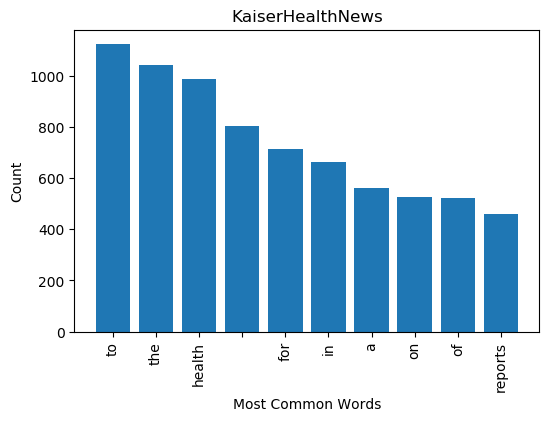

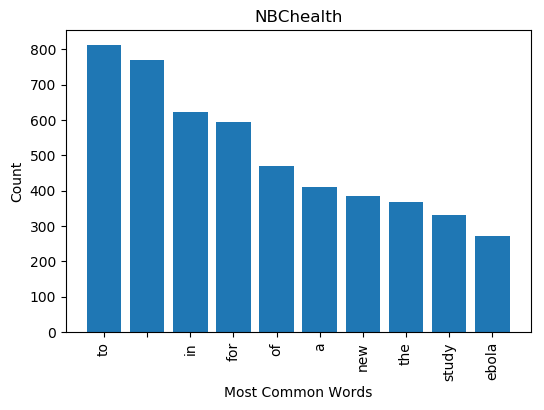

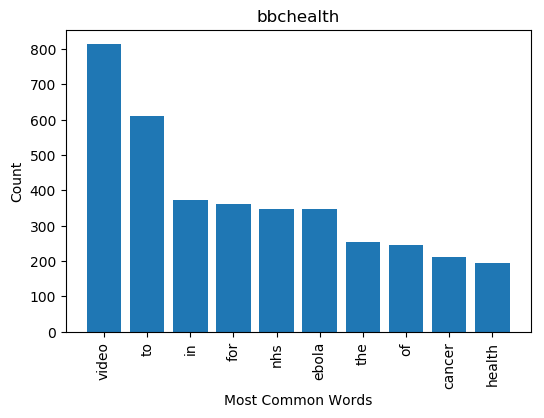

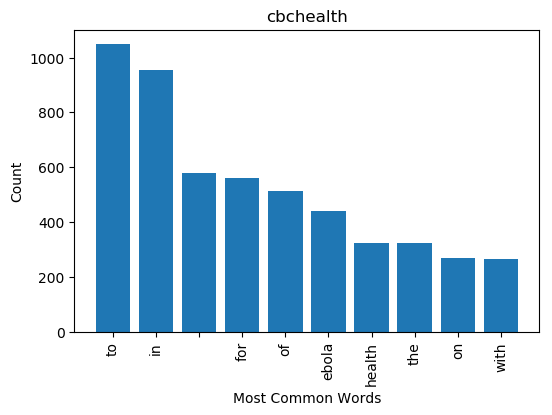

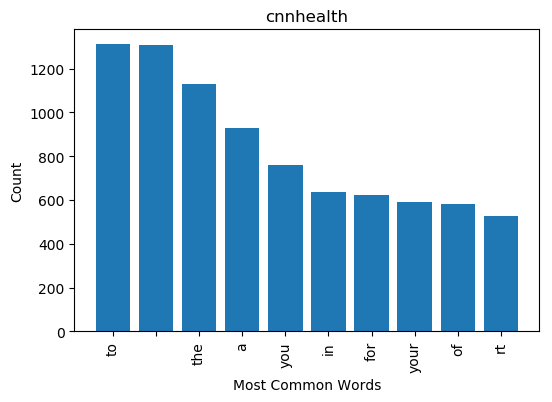

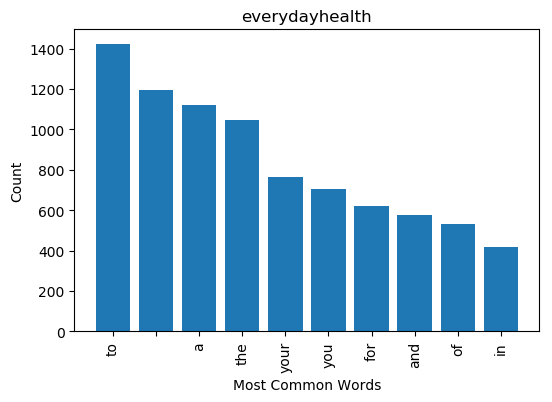

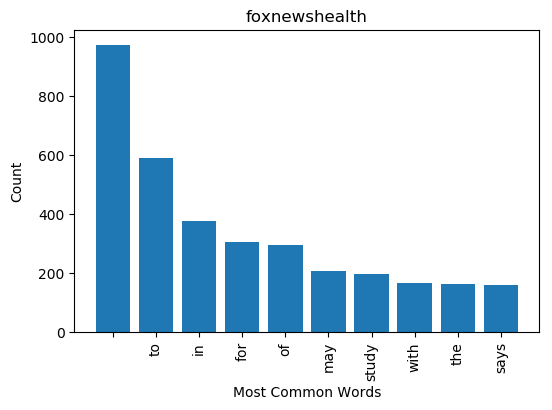

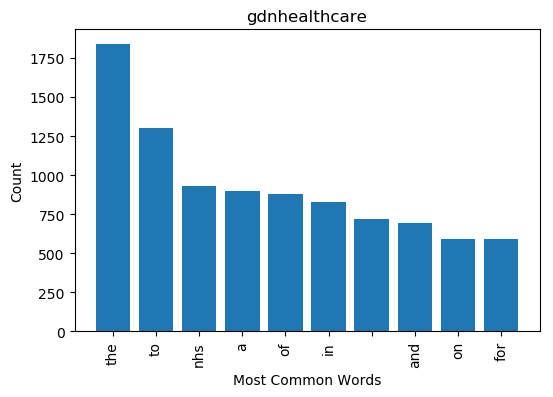

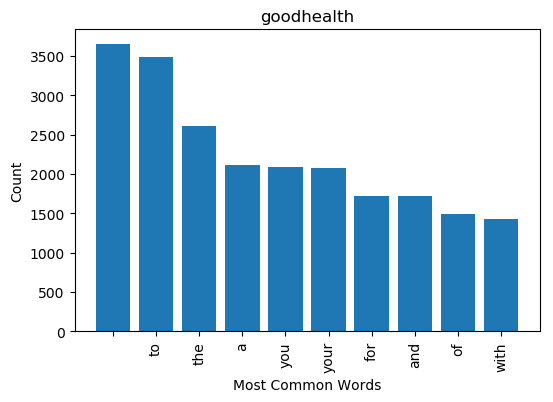

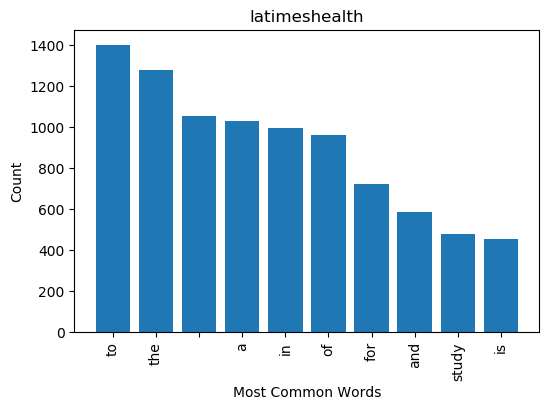

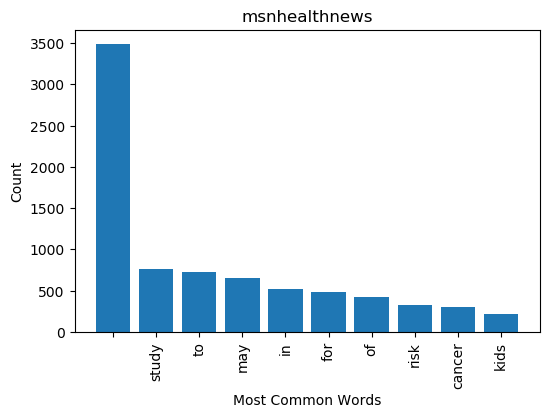

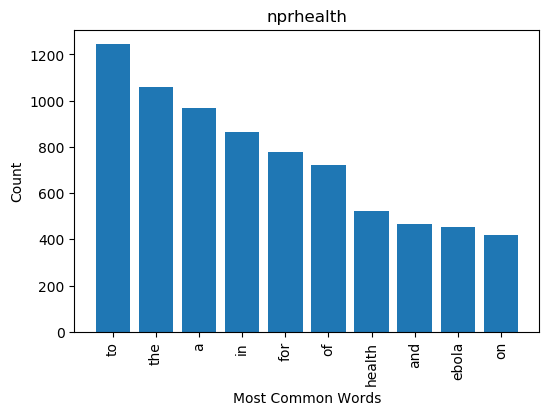

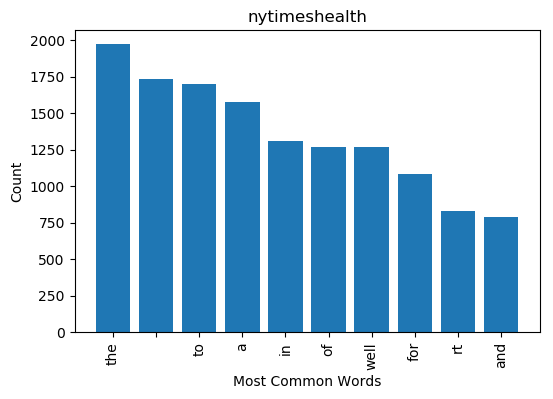

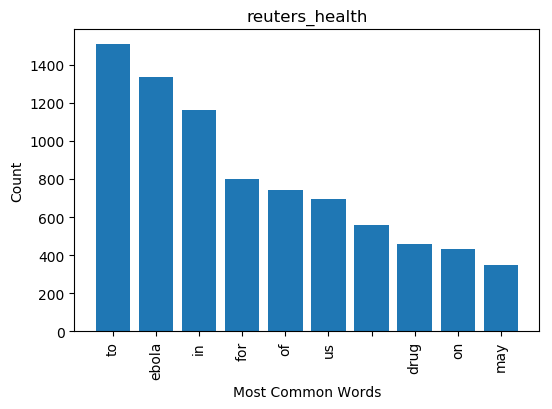

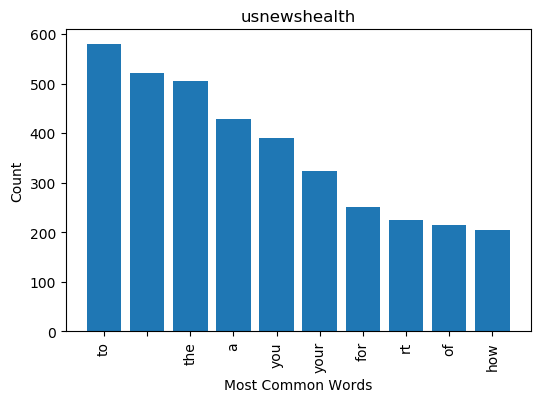

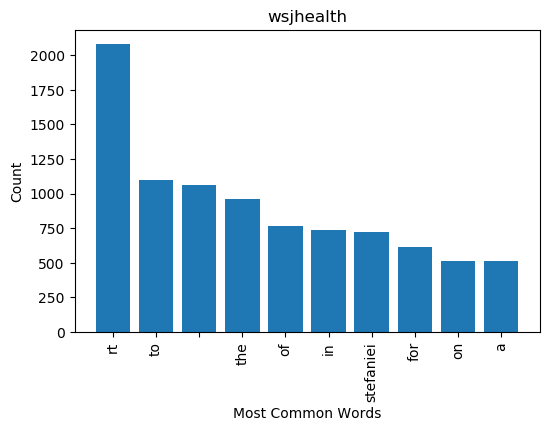

In [9]:
def plot_word_count():
    for i in range(len(file_tweet)):
        plt.figure(dpi = 100)
        plt.bar(*zip(*file_tweet['most_common_words'][i]))
        plt.xlabel('Most Common Words')
        plt.xticks(rotation = 90)
        plt.ylabel('Count')
        plt.title(file_tweet['Filename'][i].strip('.txt'))
plot_word_count()

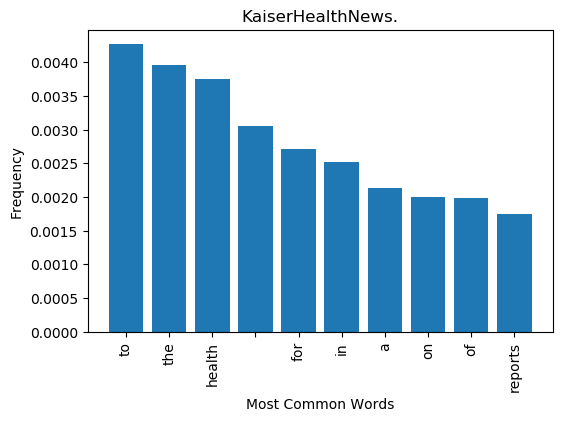

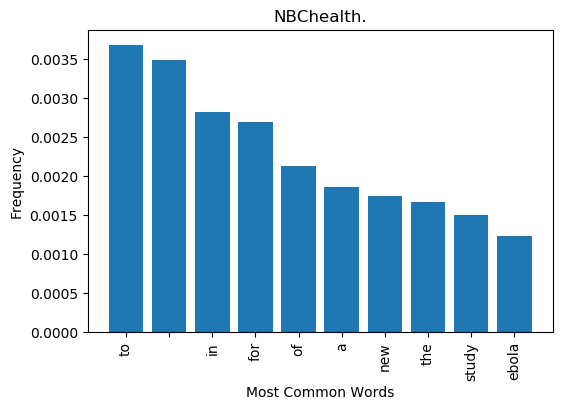

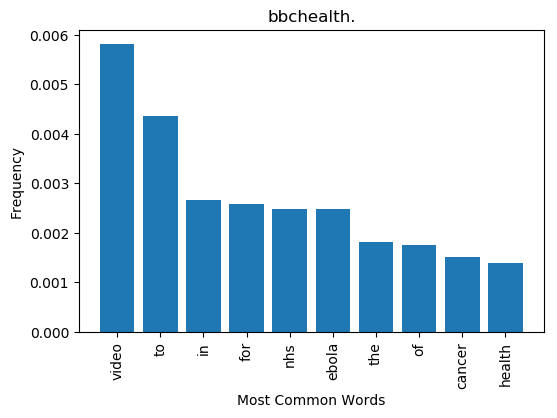

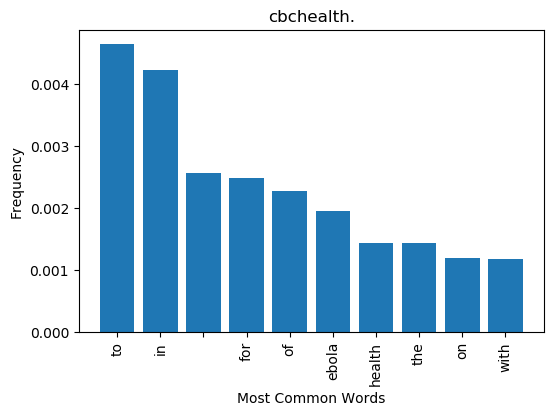

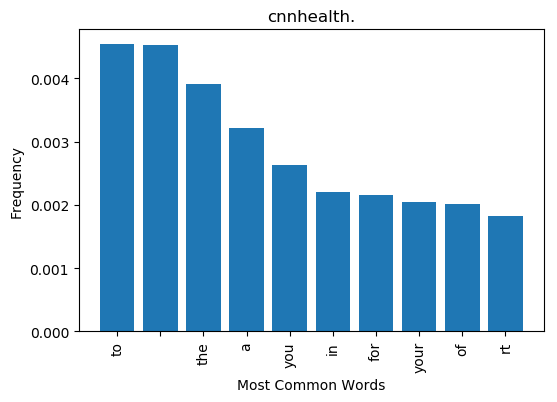

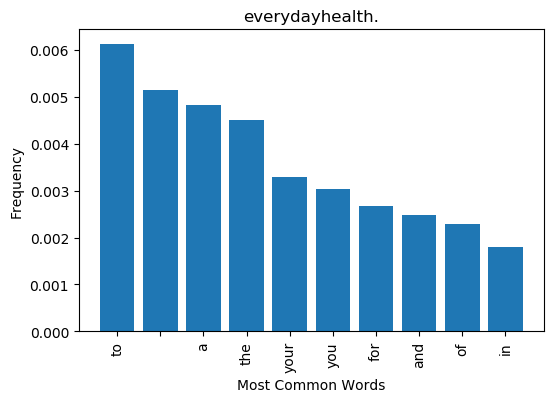

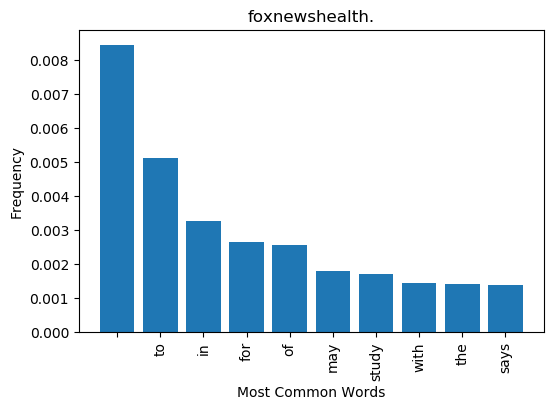

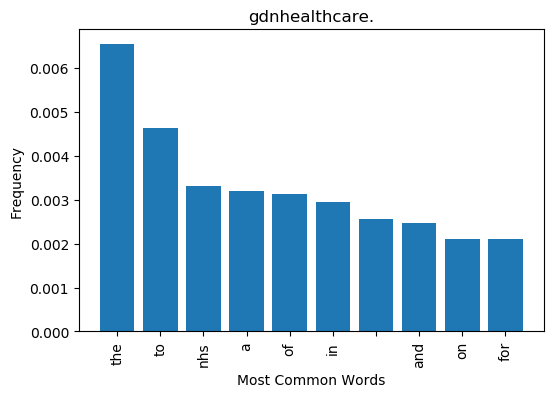

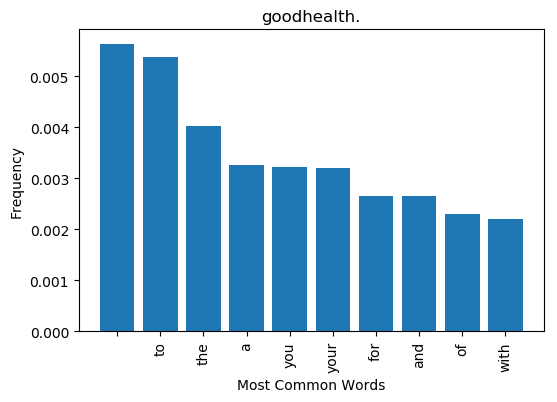

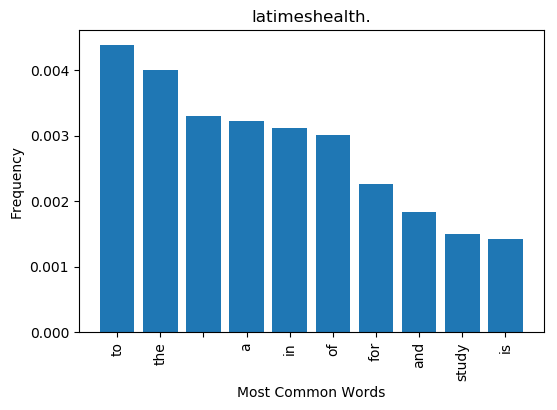

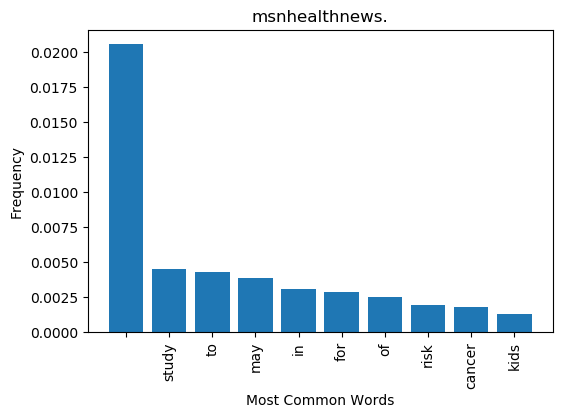

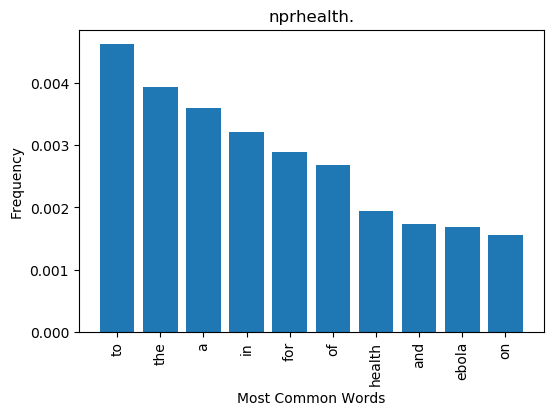

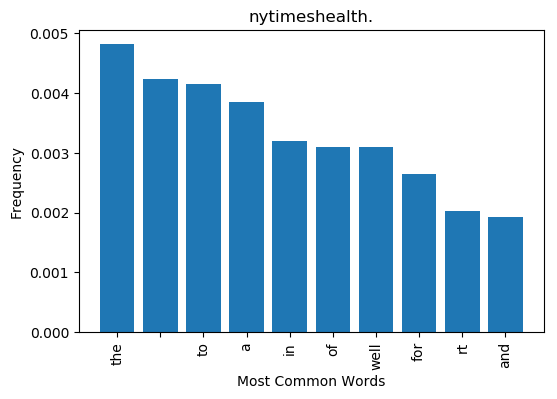

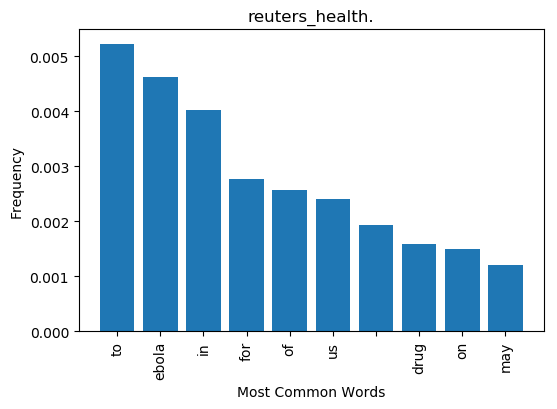

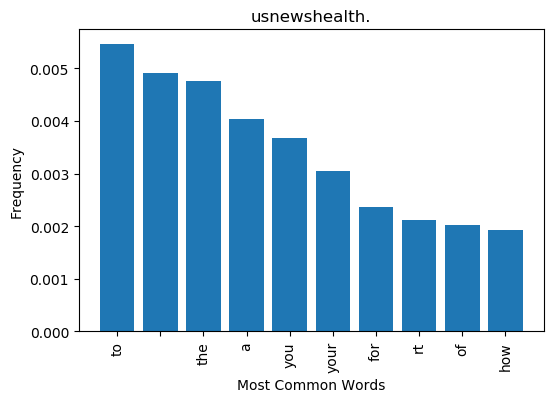

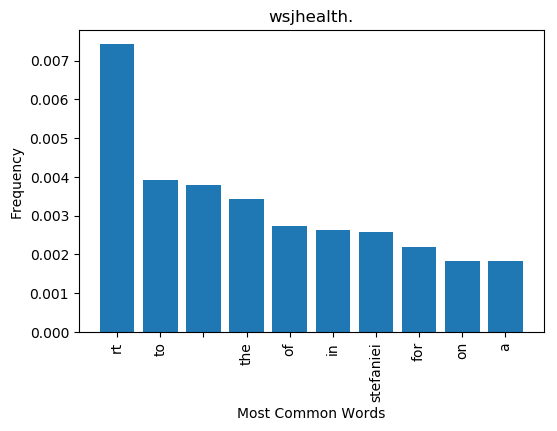

In [20]:
plot_frequency_words()

In [10]:
stop = stopwords.words('english')
more_words = ['video','audio','rt','us','new','says','amp','q']
stop.extend(more_words)
file_tweet['tweet_without_stopwords'] = file_tweet['Tweet'].apply([lambda x: ' '.join(word for word in word_tokenize(x.lower()) if word not in (stop))])
file_tweet['most_common_words'] = file_tweet.tweet_without_stopwords.apply(lambda x: Counter(str(x).lower().split(' ')).most_common(10))
most_common_words(file_tweet)

KaiserHealthNews.txt -  [('health', 986), ('reports', 461), ('insurance', 414), ('todays', 348), ('law', 327), ('obamacare', 314), ('care', 283), ('medicaid', 236), ('medicare', 224), ('cartoon', 216)]
NBChealth.txt -  [('study', 331), ('ebola', 272), ('fda', 238), ('health', 232), ('finds', 225), ('may', 213), ('cancer', 181), ('kids', 142), ('flu', 137), ('obamacare', 116)]
bbchealth.txt -  [('nhs', 348), ('ebola', 348), ('cancer', 212), ('health', 194), ('care', 182), ('hospital', 135), ('uk', 102), ('mental', 90), ('risk', 89), ('patients', 85)]
cbchealth.txt -  [('ebola', 439), ('health', 323), ('canada', 158), ('cancer', 151), ('outbreak', 148), ('study', 137), ('medical', 122), ('may', 121), ('hospital', 108), ('doctors', 107)]
cnnhealth.txt -  [('health', 238), ('may', 194), ('getfit', 175), ('cnnhealth', 159), ('tip', 156), ('todays', 152), ('cancer', 148), ('kids', 140), ('cnn', 128), ('know', 128)]
everydayhealth.txt -  [('healthtalkrt', 363), ('foods', 252), ('healthtalk', 

In [31]:
total_words = []
for i in range(len(file_tweet['tweet_without_stopwords'])):
    total_words.append(len(file_tweet['tweet_without_stopwords'][i]))
file_tweet['total_words'] = total_words

In [32]:
def plot_frequency_words():
    dataframes = {}
    for filename, words in zip(file_tweet['Filename'],file_tweet['most_common_words']):
        dataframes[filename] = pd.DataFrame(words)

    for i,frame in enumerate(dataframes):
        dataframes[frame]['frequency'] =     dataframes[frame][1]/file_tweet['total_words'][i]
        dataframes[frame].columns = ['word','word_count','frequency']
        
    for frame in dataframes:
        plt.figure(dpi = 100)
        plt.bar(x = dataframes[frame]['word'], height = dataframes[frame]['frequency'])
        plt.xlabel('Most Common Words')
        plt.xticks(rotation = 90)
        plt.ylabel('Frequency')
        plt.title(frame.strip('txt'))

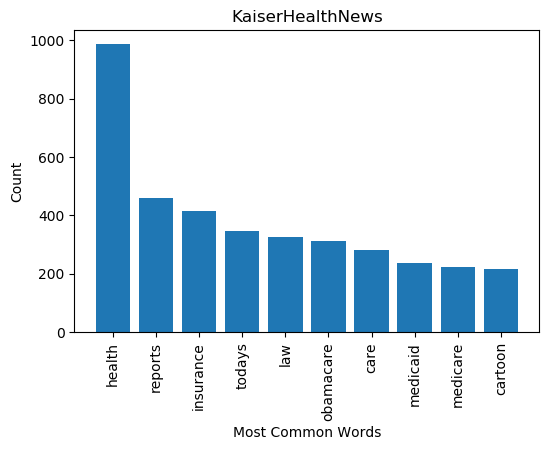

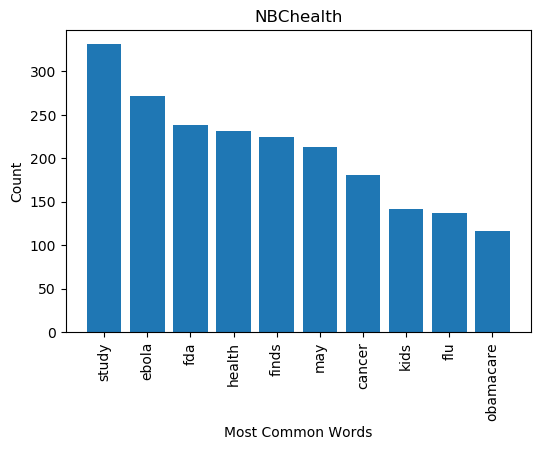

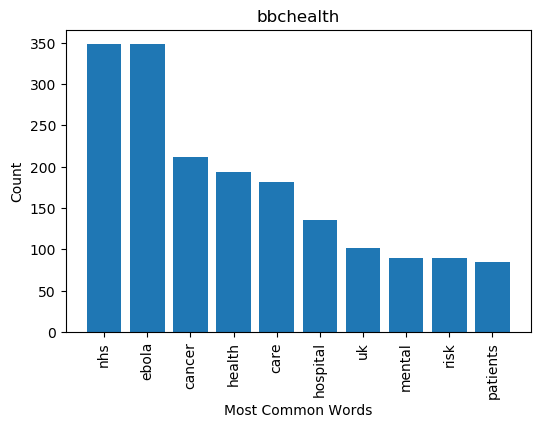

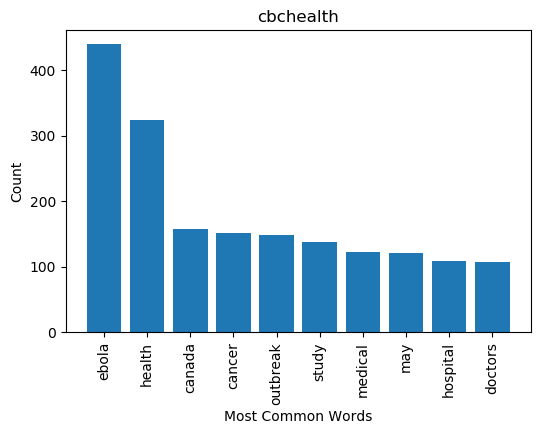

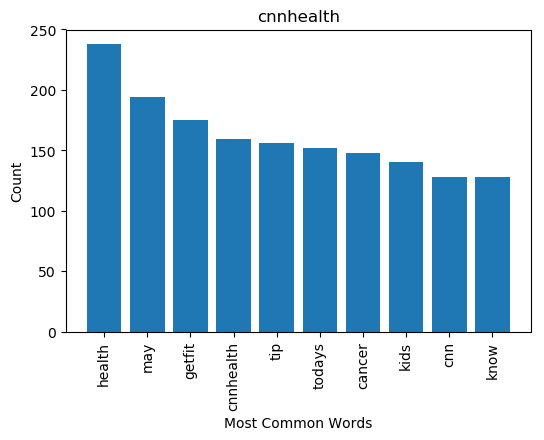

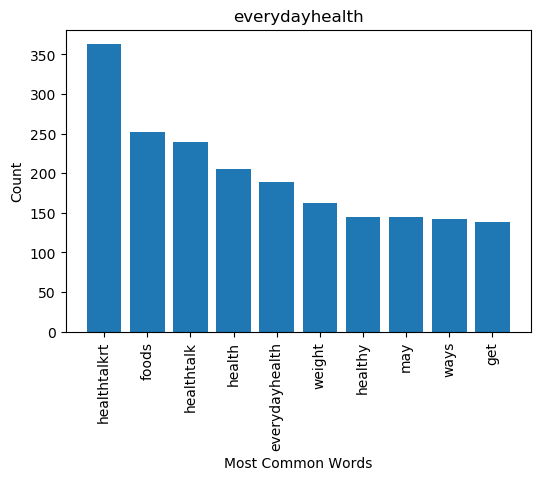

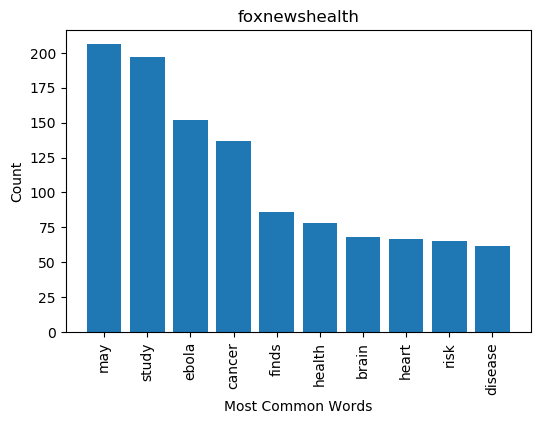

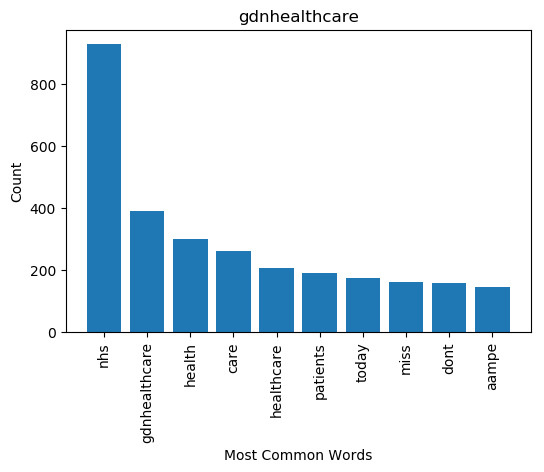

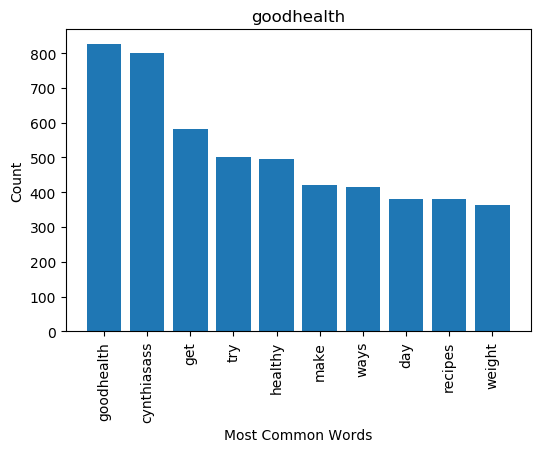

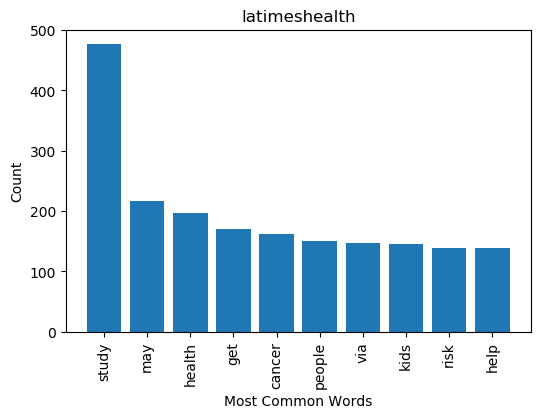

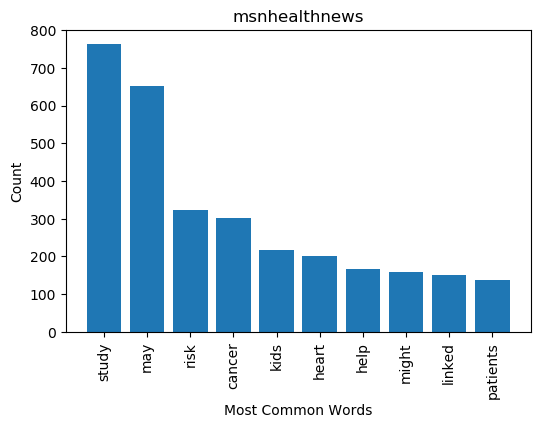

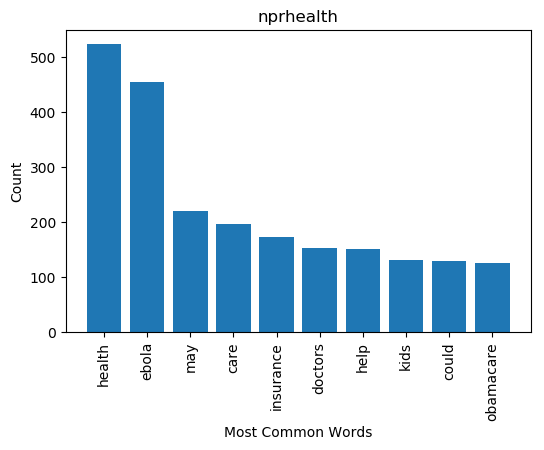

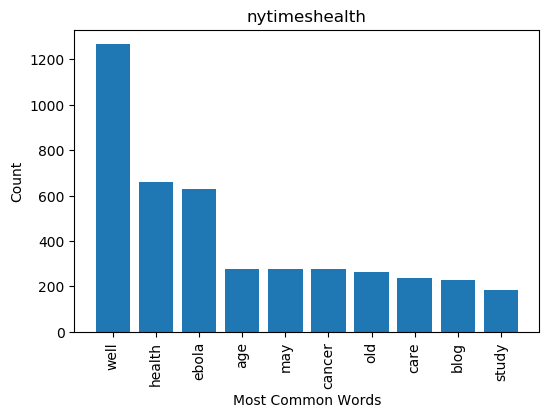

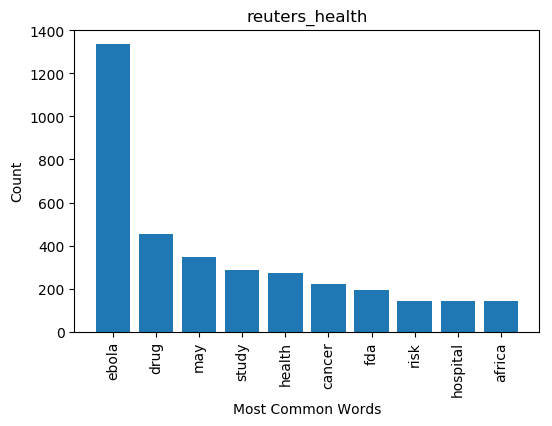

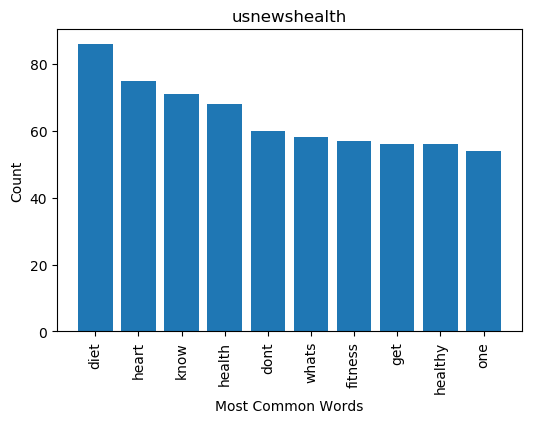

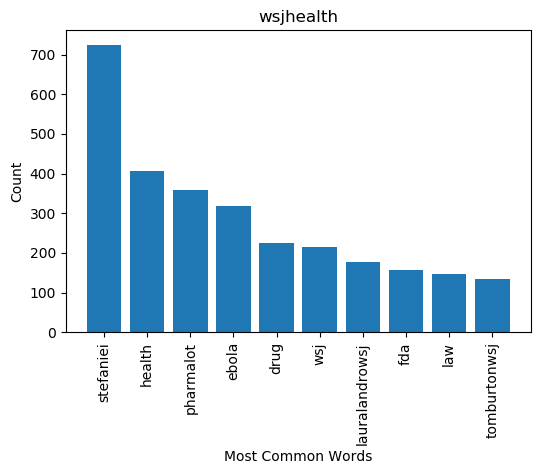

In [33]:
plot_word_count()

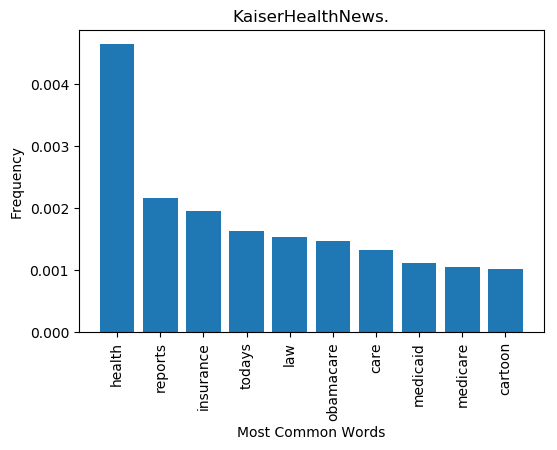

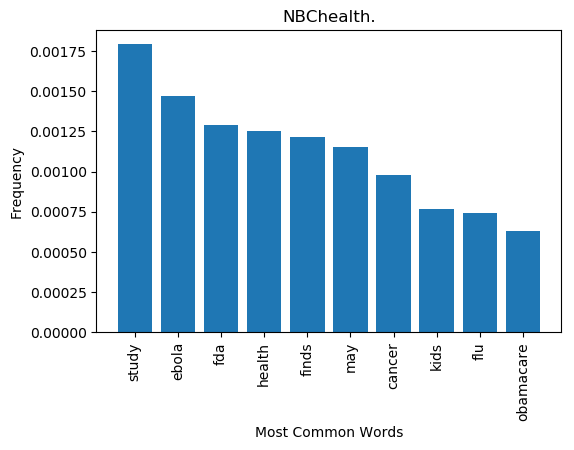

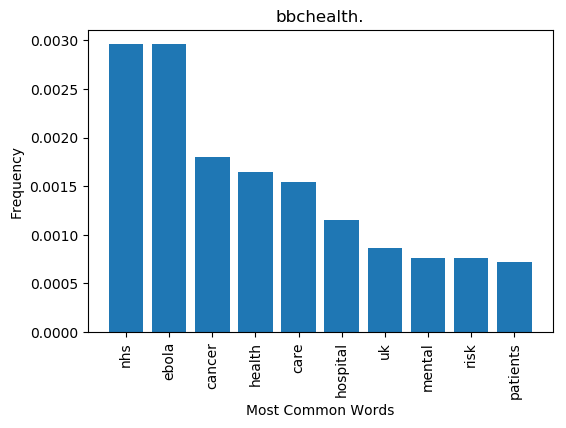

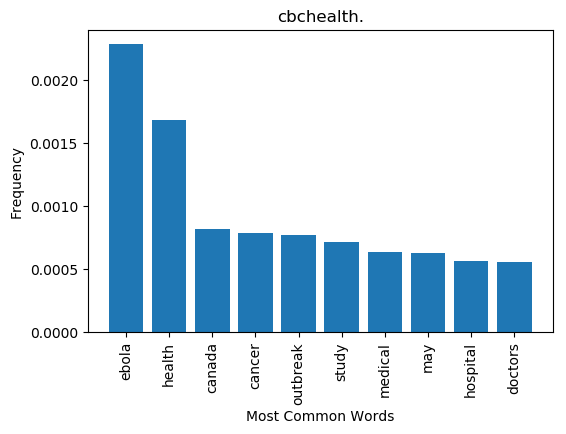

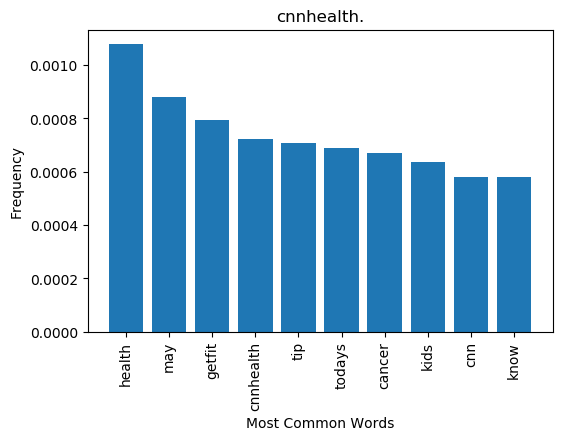

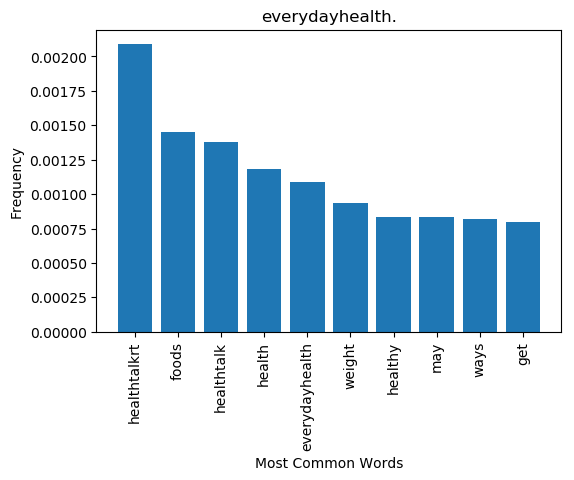

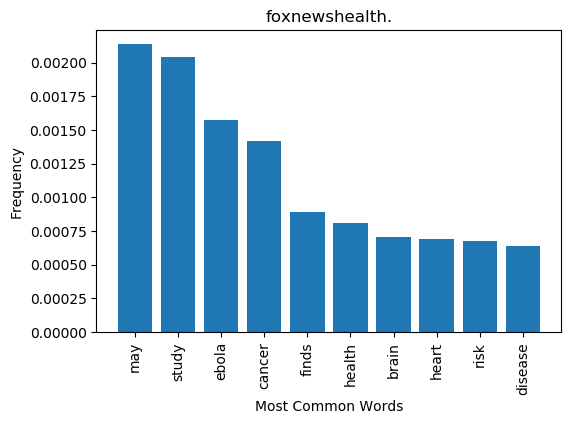

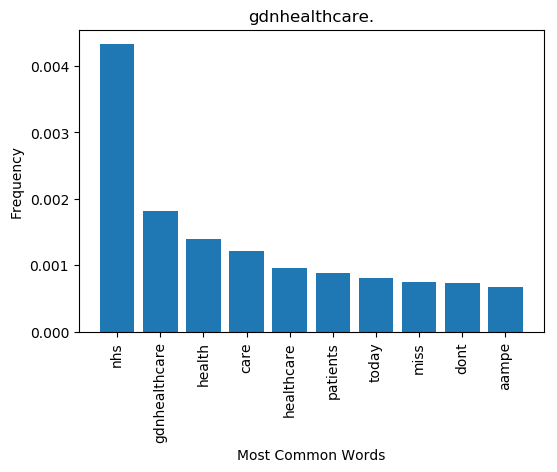

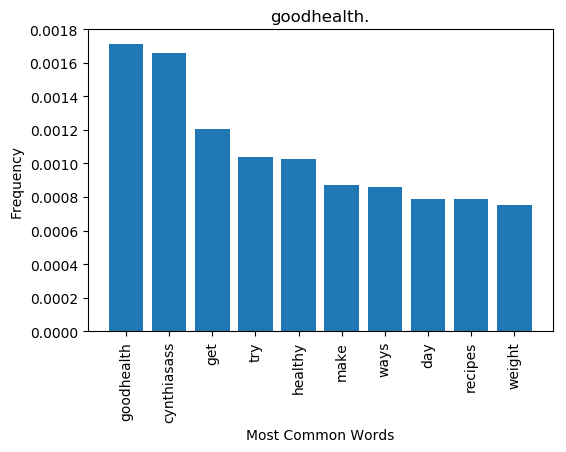

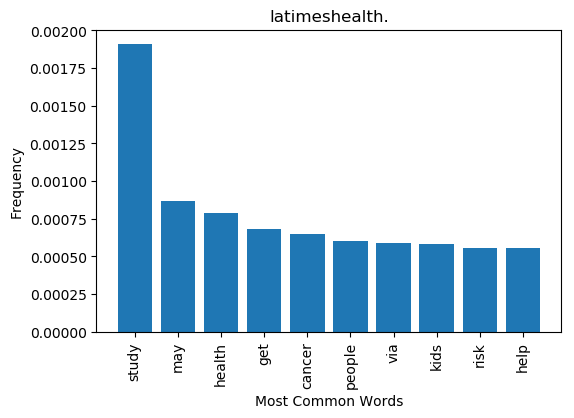

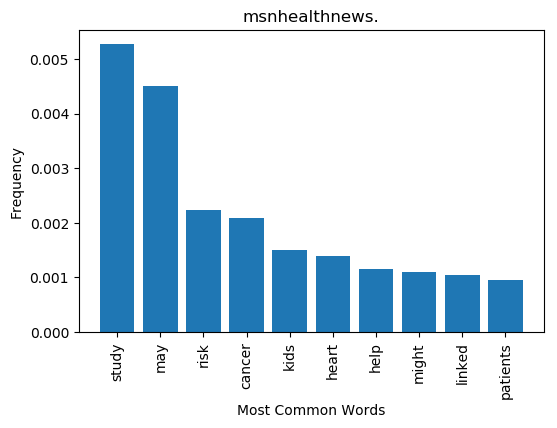

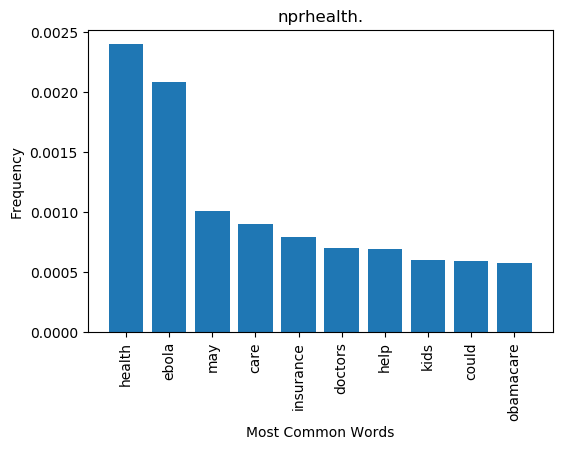

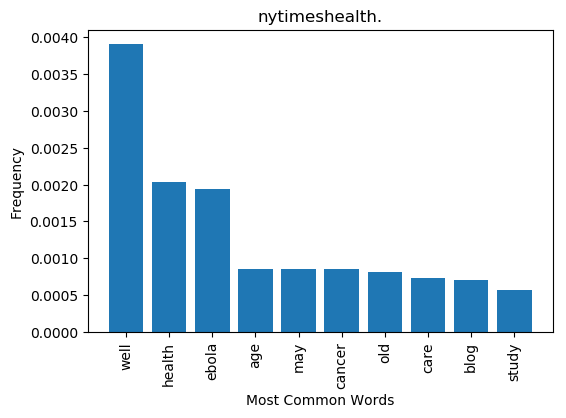

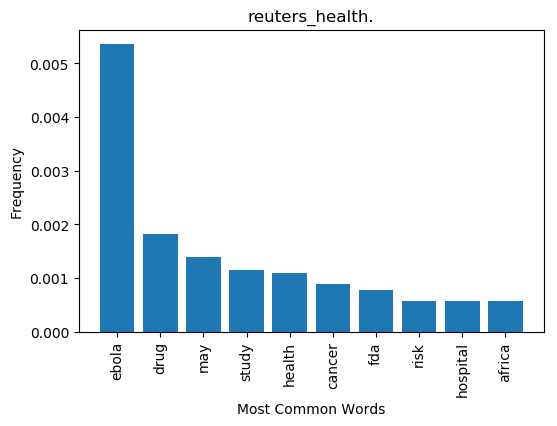

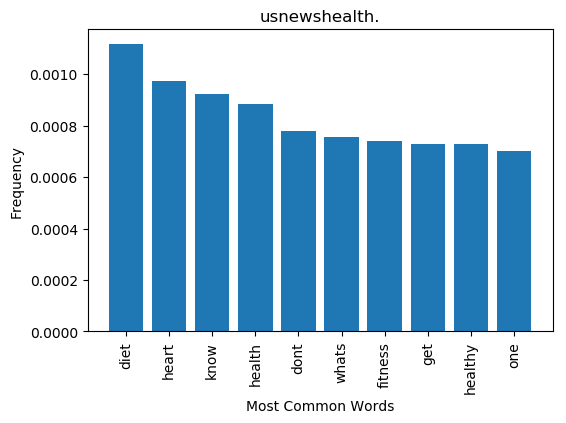

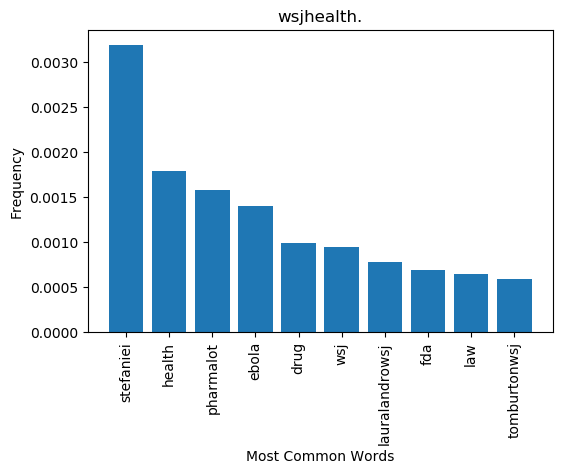

In [34]:
plot_frequency_words()

In [103]:
v = TfidfVectorizer(lowercase=True)
x = v.fit_transform(tweet_data['Tweet'].tolist())

In [117]:
print(x)

  (0, 3622)	0.37555323720462724
  (0, 4330)	0.2821631357184048
  (0, 25826)	0.3057084897949824
  (0, 30359)	0.37592273891245265
  (0, 7972)	0.7379486055969705
  (1, 12672)	0.3480544542763573
  (1, 33673)	0.4856885799671625
  (1, 13345)	0.4519283760986408
  (1, 4466)	0.22708555700668737
  (1, 3245)	0.5085804257212821
  (1, 23115)	0.3584739089485256
  (2, 25826)	0.30073103262239487
  (2, 27401)	0.4778522774902349
  (2, 22413)	0.5855029621050103
  (2, 13599)	0.3192551682640153
  (2, 12790)	0.48629257224251077
  (3, 20286)	0.2687587462453358
  (3, 1533)	0.5297186917548985
  (3, 566)	0.416681355627878
  (3, 13985)	0.4185551274206375
  (3, 23847)	0.5462189095080121
  (4, 5694)	0.5987931346784435
  (4, 31862)	0.6727441059456193
  (4, 20367)	0.3001963473843665
  (4, 8500)	0.31423606221195777
  :	:
  (63025, 10400)	0.34548353034904217
  (63025, 20835)	0.29848330151128283
  (63025, 24176)	0.28775564516562435
  (63025, 16872)	0.2933512851491739
  (63025, 26125)	0.12109305401497311
  (63025, 7426)

In [104]:
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(x)
print(svd.explained_variance_ratio_) 

[0.00288525 0.00431485]


In [105]:
reduced_data

array([[ 0.04815071, -0.04455404],
       [ 0.01679801, -0.01424896],
       [ 0.03241568, -0.01966009],
       ...,
       [ 0.11349768, -0.02210149],
       [ 0.00850563, -0.00778924],
       [ 0.1114256 , -0.10264374]])

In [106]:
kmeans = KMeans(n_clusters=16)
model_kmeans = kmeans.fit(reduced_data)
model_predict = kmeans.predict(reduced_data)

Text(0.5,1,'K-Means Clustering for 16 Clusters')

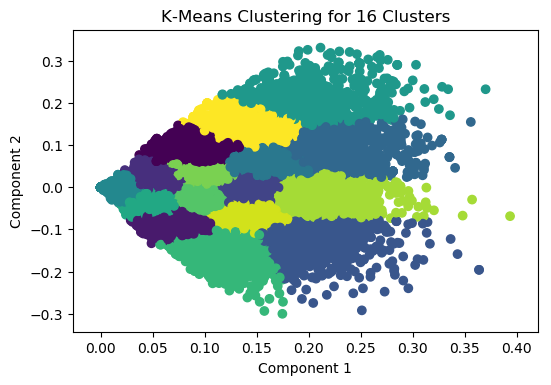

In [107]:
plt.figure(dpi = 100)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c= model_predict)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering for 16 Clusters')

In [108]:
X = reduced_data
distorsions = []
for k in range(1, 17):
    kmeans = KMeans(n_clusters=k).fit(X)
    kmeans.fit(X)
    distorsions.append(np.average(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))

Text(0,0.5,'Distortion')

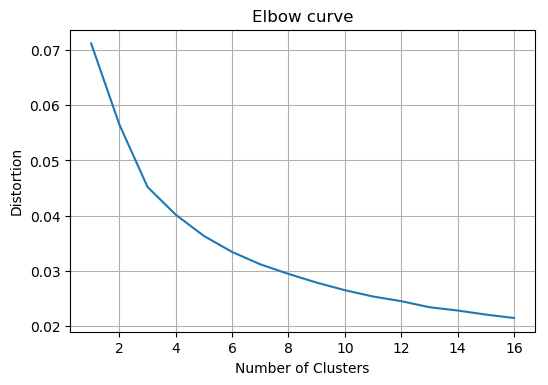

In [109]:
fig = plt.figure(dpi=100)
plt.plot(range(1, 17), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

In [118]:
kmeans = KMeans(n_clusters=3)
model_kmeans = kmeans.fit(reduced_data)
model_predict = kmeans.predict(reduced_data)

Text(0.5,1,'K-Means Clustering for 3 Clusters')

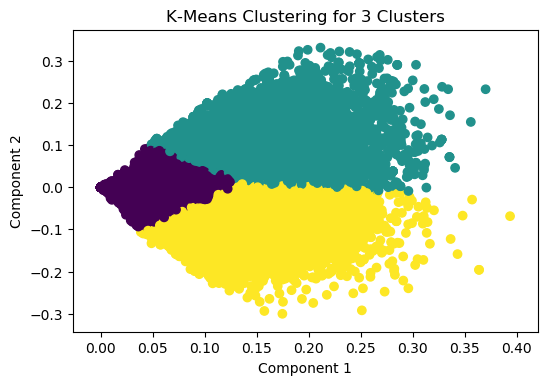

In [119]:
plt.figure(dpi = 100)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c= model_predict)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering for 3 Clusters')